In [1]:
library(caret)


Loading required package: lattice

Loading required package: ggplot2



In [2]:
install.packages('e1071', dependencies = TRUE)

also installing the dependencies ‘proxy’, ‘cluster’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
install.packages('caret', dependencies = TRUE)

Warning message:
“dependencies ‘ROCR’, ‘coin’ are not available”
also installing the dependencies ‘rappdirs’, ‘ellipsis’, ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘vctrs’, ‘cpp11’, ‘lifecycle’, ‘tidyselect’, ‘pillar’, ‘httpuv’, ‘htmltools’, ‘sourcetools’, ‘rlang’, ‘fastmap’, ‘bslib’, ‘cachem’, ‘magrittr’, ‘R.cache’, ‘haven’, ‘dplyr’, ‘profileModel’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plotrix’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘combinat’, ‘questionr’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘BradleyTerry2’, ‘earth’, ‘fastICA’, ‘gam’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘MLmetrics’, ‘party’, ‘pls’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘superpc’, ‘Cubist’


Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("caret", dependencie

In [4]:
library(e1071)

In [13]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")


In [14]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [15]:
dim(dataset)

[1] 120   5

In [16]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [17]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [19]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)


,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [20]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.865   Mean   :3.058   Mean   :3.767   Mean   :1.199  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

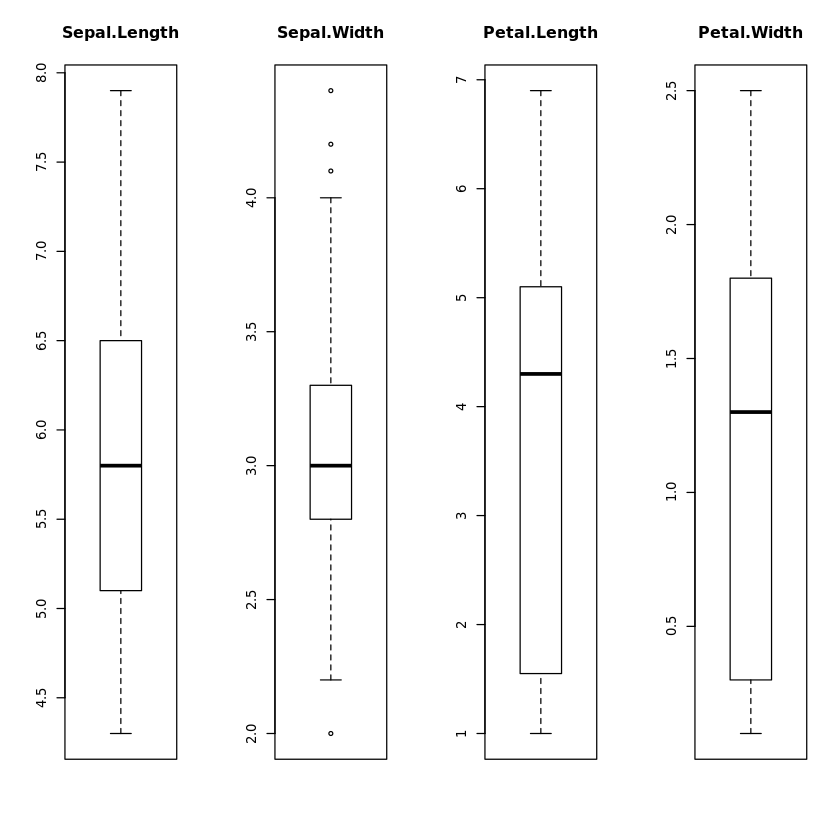

In [22]:
x <- dataset[,1:4]
y <- dataset[,5]

par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

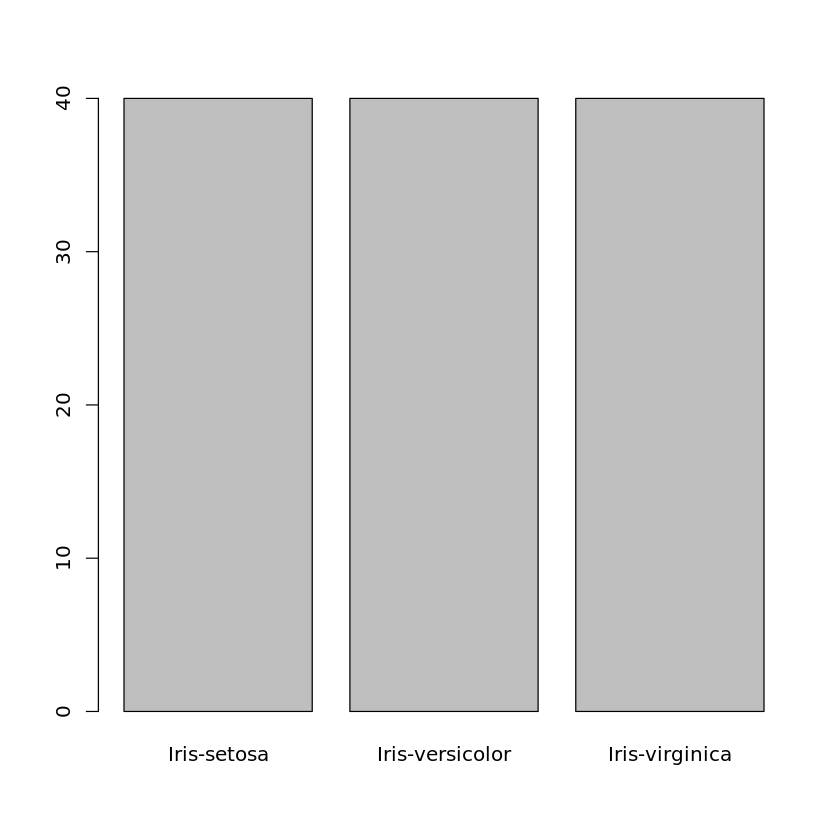

In [23]:
plot(y)

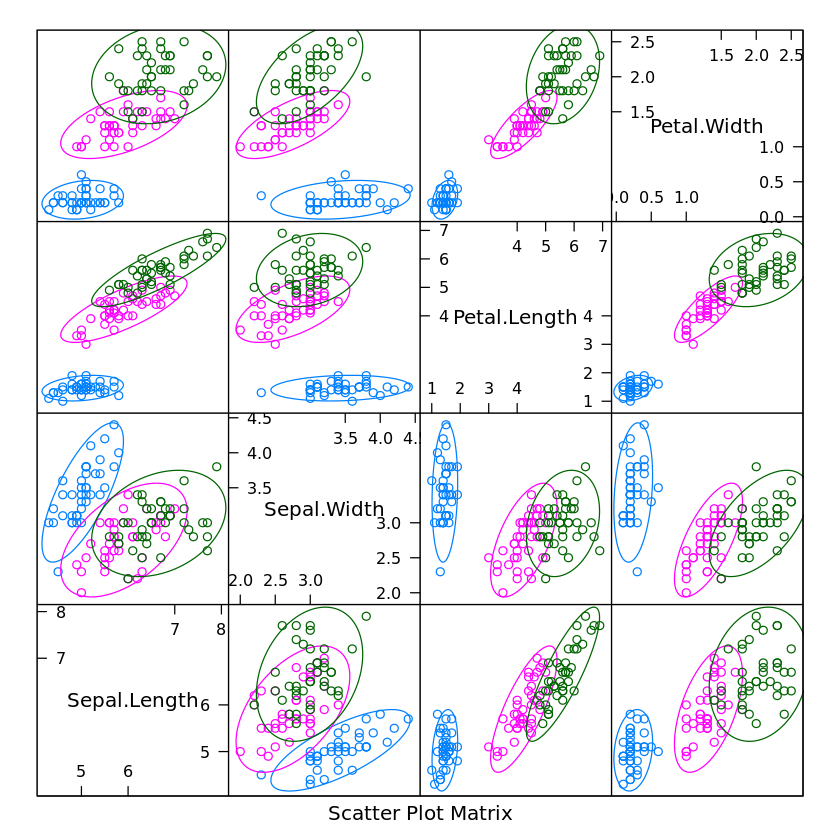

In [24]:
featurePlot(x=x, y=y, plot="ellipse")


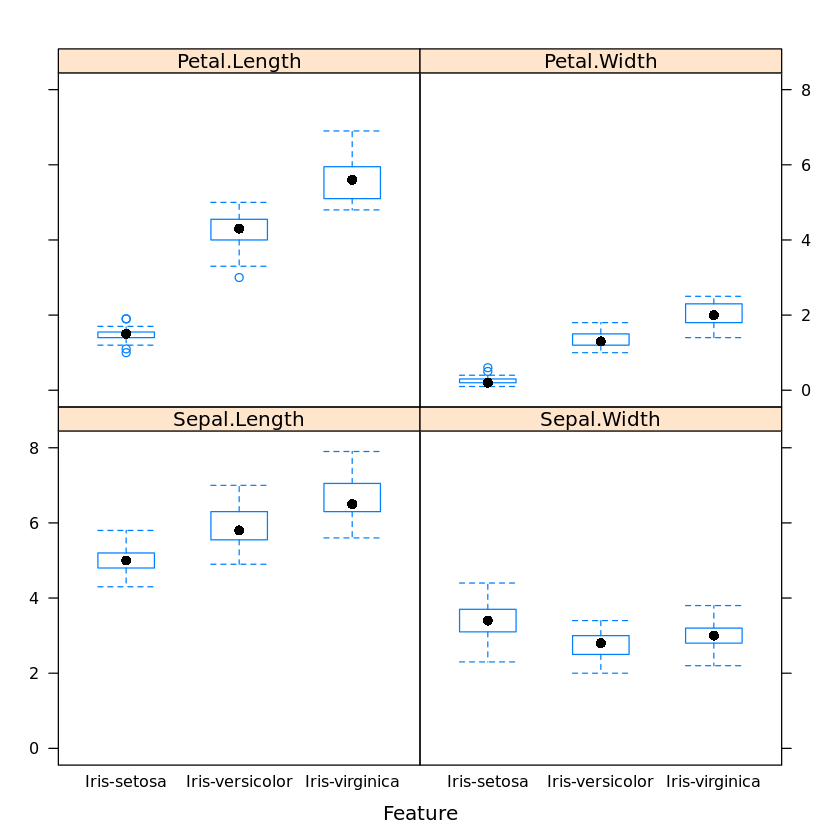

In [25]:
featurePlot(x=x, y=y, plot="box")

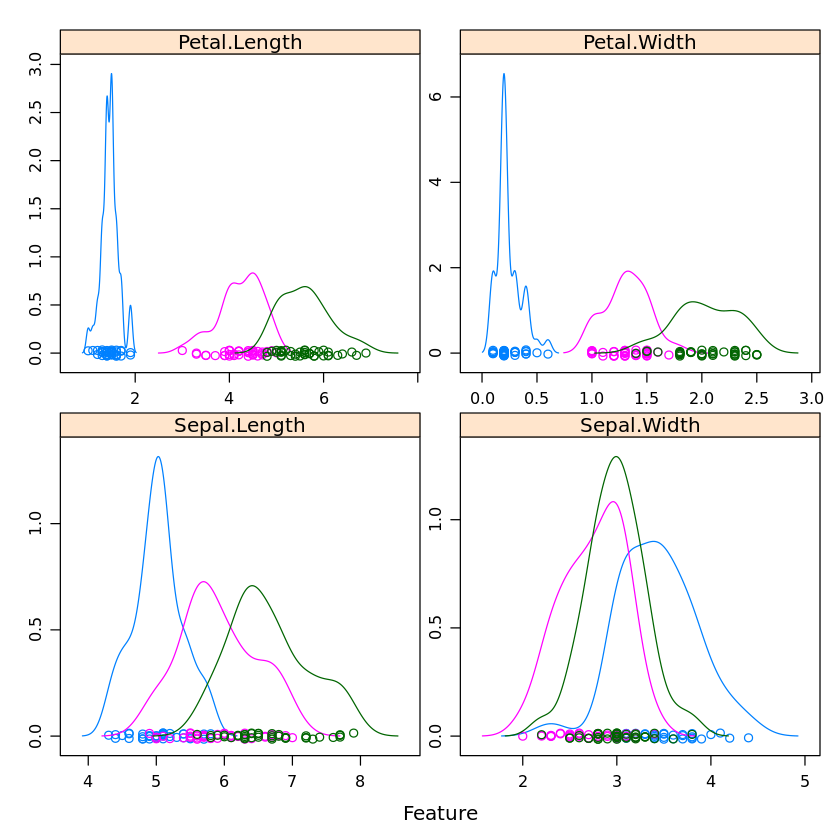

In [26]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [27]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [28]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [29]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9250000 0.9166667    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333 1.0000000    1    0
rf   0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000 1.0000 0.9750   1.000    1    0
cart 0.750 0.87500 0.8750 0.8875   0.875    1    0
knn  0.875 1.00000 1.0000 0.9750   1.000    1    0
svm  0.875 0.87500 0.9375 0.9375   1.000    1    0
rf   0.750 0.90625 1.0000 0.9500   1.000    1    0


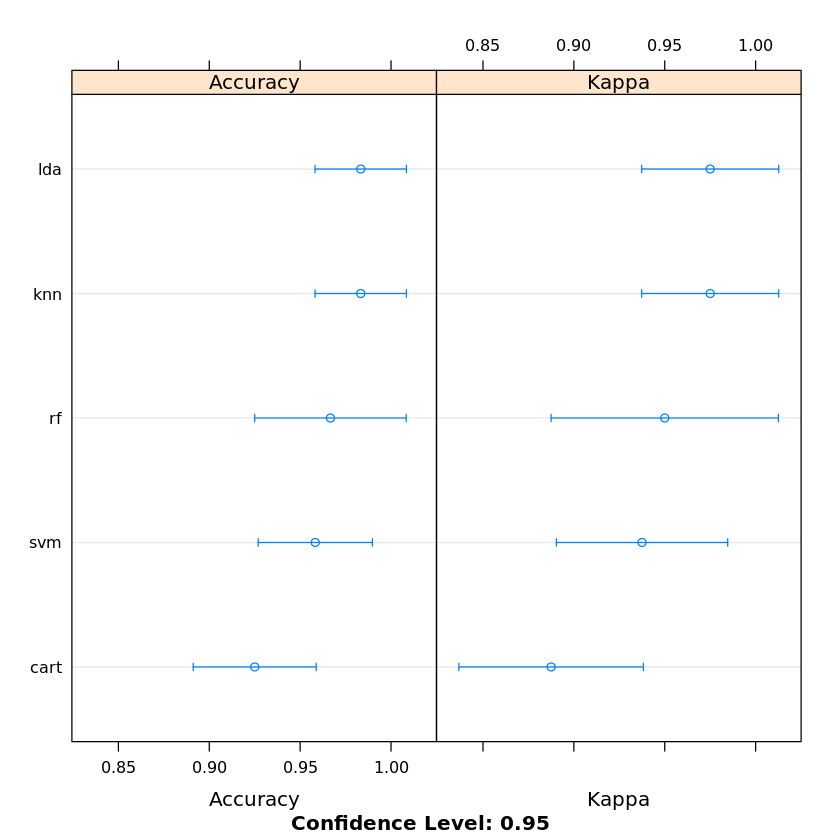

In [30]:
dotplot(results)

In [31]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [32]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)


Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              0
  Iris-virginica            0               1             10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.9000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value